In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
plt.rcdefaults()
plt.rcParams.update({'figure.dpi':100})
#plt.rcParams.update({'figure.autolayout':'True'})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })
plt.rc('legend',**{'fontsize':'x-small'})
#plt.figure(1,figsize = [11.0, 8.5])
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'xtick.top':'True'})
plt.rcParams.update({'ytick.right':'True'})
plt.rcParams.update({'axes.formatter.limits': (-2, 2)})
plt.rcParams.update({'lines.markersize': 8}) #6 is the default
plt.rcParams.update({'legend.framealpha': 1.0})
plt.rcParams.update({'legend.fancybox': 'False'})
#plt.rcParams.update({'axes.grid':'True'})

In [58]:
# Global variables
#Percentages = [0.6827, 0.9545]
Percentages = [0.2, 0.4, 0.6, 0.8, 0.9]
d = 2

In [4]:
def get_levels(likelihood, percentages):
    l_flatten = likelihood.flatten()
    l_flatten.sort()
    l_dec = l_flatten[::-1]
    l_tot = np.sum(l_dec)
    levels = []
    l_sum = 0
    i = -1
    for percentage in percentages:
        while((l_sum/l_tot)<percentage):
            i += 1
            l_sum += l_dec[i]
        levels.append(l_dec[i])
    return levels[::-1]

In [87]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return ((1/(np.sqrt(((2*np.pi)**d)*np.linalg.det(covariance))))*
            np.exp(-((x_m.T)@np.linalg.inv(covariance)@(x_m))/2))

'''
u1, u2: random variables given mean and covariance
x, y: functions of random variable
'''
def generate_non_gaussian_surface(mean, covariance, d, n_u1, n_u2):#, u1_param, u2_param):
    """Helper function to generate density surface."""
    # Generate random variables u1 & u2
    u1s = np.linspace(-5, 5, num=n_u1)
    u2s = np.linspace(-5, 5, num=n_u2)
    u1, u2 = np.meshgrid(u1s, u2s) # Generate grid
    pdf = np.zeros((n_u1, n_u2))
    # Fill the cost matrix for each combination of weights
    for i in range(n_u1):
        for j in range(n_u2):
            pdf[i,j] = multivariate_normal(
                np.matrix([[u1[i,j]], [u2[i,j]]]), 
                d, mean, covariance)
    
    # Generate x, y which are functions of u1 and/or u2
    # Options for x: Linear: a*u_1
    x = u1+0.5*(u1**2)
    #xs = u1_param.a*u1
   
    # Options for y: Linear: a*u_2
    #                Linear coupled: a*u_2+b*u_1
    #                Quadratic: a*u_2^2 + b*u_2
    #                Quadratic coupled: a*u_2^2 + b*u_1*u_2 + c*u_1^2
    y = u2+0.5*(u2**2)
    #ys = u2_param.a*u2
    #ys = u2_param.a*u2 + u2_param.b*u1
    #ys = u2_param.a*(u2**2) + u2_param.b*u2
    #ys = u2_param.a*(u2**2) + u2_param.b*u2*u1 + u2_param.c*(u1**2)
    
    ############ NOT REAL VALUES. TESTING ONLY ###############
    mu_x = 1
    sigma_x = 1
    
    mu_y = 1
    sigma_y = 1
    
    a = 0.1
    
    mu_xy = np.matrix([[mu_x], [mu_y]])
    cov_xy = np.matrix([[(sigma_x**2), a], 
                        [a, (sigma_y**2)]])
    ########### ^NOT REAL VALUES. TESTING ONLY^ ##############
    
    pdf_xy = np.zeros((n_u1, n_u2))
    # Fill the cost matrix for each combination of weights
    for i in range(n_u1):
        for j in range(n_u2):
            pdf_xy[i,j] = multivariate_normal(
                np.matrix([[x[i,j]], [y[i,j]]]), 
                d, mu_xy, cov_xy)
    return u1, u2, pdf_xy  # x1, x2, pdf(x1,x2)

In [88]:
mu_u1, mu_u2 = 0, 0
sigma_u1, sigma_u2 = 1, 1
alpha = 0
n_row, n_col = 101, 101
# u1_params = Param(0.1, 0.2, 0.3)
# u2_params = Param(0.1, 0.2, 0.3)

mu = np.matrix([[mu_u1], [mu_u2]])  # Mean
cov = np.matrix([[(sigma_u1**2), alpha], 
                 [alpha, (sigma_u2**2)]])  # Covariance

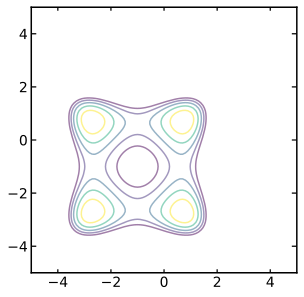

In [89]:
fig, ax = plt.subplots(1, 1)

P, B, L = generate_non_gaussian_surface(mu, cov, d, 
                                        n_row, n_col) 
                                        #u1_params, u2_params) # B and P are meshgrid variables
Levels = get_levels(L, Percentages)
p = P[0]
b = B.T[0]
ax.contour(p, b, L, levels=Levels, alpha=0.5, extend='both')
ax.set_aspect('equal')

In [48]:
def generate_non_gaussian_surface_from_function(mean, covariance, d, n_u1, n_u2, u1_factor, u2_factor, u1u2_factor):
    """Helper function to generate density surface."""
    # Generate random variables u1 & u2
    u1s = np.linspace(-5, 5, num=n_u1)
    u2s = np.linspace(-5, 5, num=n_u2)
    u1, u2 = np.meshgrid(u1s, u2s) # Generate grid
    pdf = np.zeros((n_u1, n_u2))
    # Fill the cost matrix for each combination of weights
    for i in range(n_u1):
        for j in range(n_u2):
            pdf[i,j] = multivariate_normal(
                np.matrix([[u1[i,j]], [u2[i,j]]]), 
                d, mean, covariance)
    
    # Generate x, y which are functions of u1 and/or u2
    x = u1_factor*u1+u2_factor*u2

    y = u1u2_factor*u1*u2
    ############ NOT REAL VALUES. TESTING ONLY ###############
    mu_x = 1
    sigma_x = 1
    
    mu_y = 1
    sigma_y = 1
    
    a = 0.1
    
    mu_xy = np.matrix([[mu_x], [mu_y]])
    cov_xy = np.matrix([[(sigma_x**2), a], 
                        [a, (sigma_y**2)]])
    ########### ^NOT REAL VALUES. TESTING ONLY^ ##############
    
    pdf_xy = np.zeros((n_u1, n_u2))
    # Fill the cost matrix for each combination of weights
    for i in range(n_u1):
        for j in range(n_u2):
            pdf_xy[i,j] = multivariate_normal(
                np.matrix([[x[i,j]], [y[i,j]]]), 
                d, mu_xy, cov_xy)
    return u1, u2, pdf_xy  # x1, x2, pdf(x1,x2)

In [49]:
mu_u1, mu_u2 = 0, 0
sigma_u1, sigma_u2 = 1, 1
alpha = 0
n_row, n_col = 101, 101
# u1_params = Param(0.1, 0.2, 0.3)
# u2_params = Param(0.1, 0.2, 0.3)

mu = np.matrix([[mu_u1], [mu_u2]])  # Mean
cov = np.matrix([[(sigma_u1**2), alpha], 
                 [alpha, (sigma_u2**2)]])  # Covariance

u1_factors = [-5, -1, 1, 5]
u2_factors = [-5, -1, 1, 5]
u1u2_factors = [-5, -1, 1, 5]

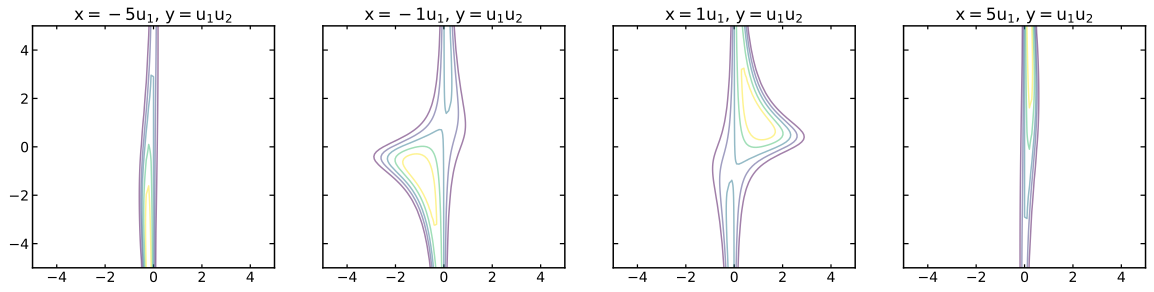

In [50]:
fig, ax = plt.subplots(1, 4, figsize=(20, 80), sharey=True)

for i in range(len(u1_factors)):
    P, B, L = generate_non_gaussian_surface_from_function(mu, cov, d, 
                                            n_row, n_col, u1_factors[i], 0, 1) 
                                            #u1_params, u2_params) # B and P are meshgrid variables
    Levels = get_levels(L, Percentages)
    p = P[0]
    b = B.T[0]
    ax[i].contour(p, b, L, levels=Levels, alpha=0.5, extend='both')
    ax[i].set_aspect('equal')
    ax[i].set_title(r'$x={}u_1$, $y=u_1u_2$'.format(u2_factors[i]))

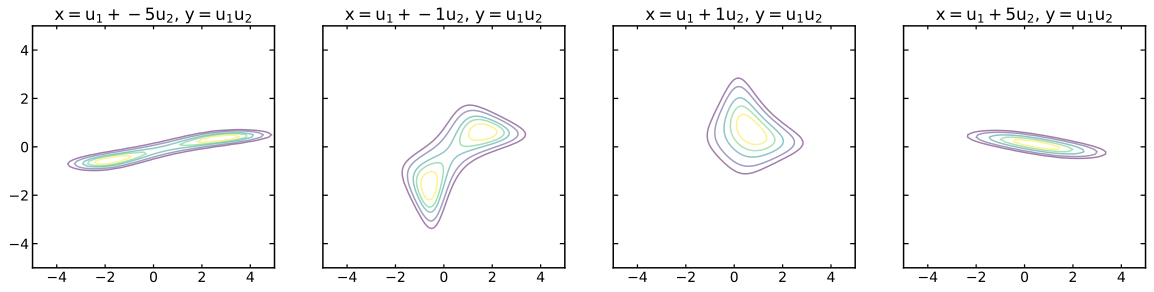

In [51]:
fig, ax = plt.subplots(1, 4, figsize=(20, 80), sharey=True)

for i in range(len(u1_factors)):
    P, B, L = generate_non_gaussian_surface_from_function(mu, cov, d, 
                                            n_row, n_col, 1, u2_factors[i], 1) 
                                            #u1_params, u2_params) # B and P are meshgrid variables
    Levels = get_levels(L, Percentages)
    p = P[0]
    b = B.T[0]
    ax[i].contour(p, b, L, levels=Levels, alpha=0.5, extend='both')
    ax[i].set_aspect('equal')
    ax[i].set_title(r'$x=u_1+{}u_2$, $y=u_1u_2$'.format(u2_factors[i]))

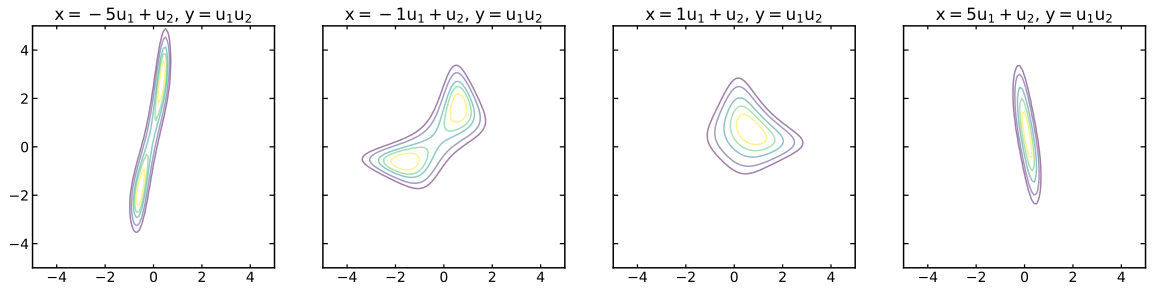

In [55]:
fig, ax = plt.subplots(1, 4, figsize=(20, 80), sharey=True)

for i in range(len(u1_factors)):
    P, B, L = generate_non_gaussian_surface_from_function(mu, cov, d, 
                                            n_row, n_col, u1_factors[i], 1, 1) 
                                            #u1_params, u2_params) # B and P are meshgrid variables
    Levels = get_levels(L, Percentages)
    p = P[0]
    b = B.T[0]
    ax[i].contour(p, b, L, levels=Levels, alpha=0.5, extend='both')
    ax[i].set_aspect('equal')
    ax[i].set_title(r'$x={}u_1+u_2$, $y=u_1u_2$'.format(u2_factors[i]))

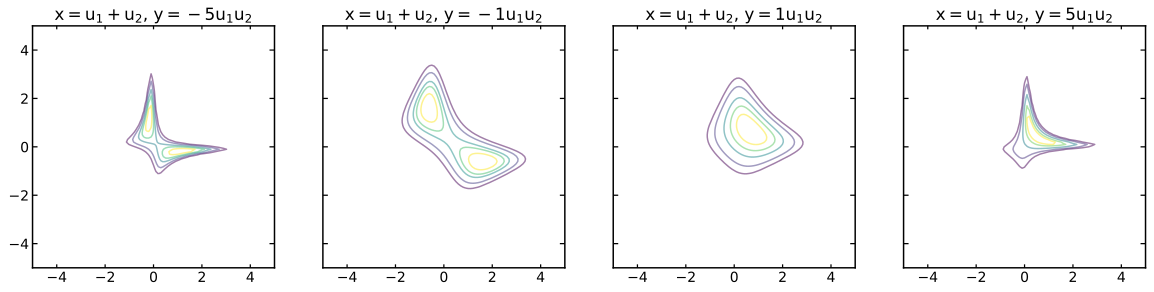

In [52]:
fig, ax = plt.subplots(1, 4, figsize=(20, 80), sharey=True)

for i in range(len(u1_factors)):
    P, B, L = generate_non_gaussian_surface_from_function(mu, cov, d, 
                                            n_row, n_col, 1, 1, u1u2_factors[i]) 
                                            #u1_params, u2_params) # B and P are meshgrid variables
    Levels = get_levels(L, Percentages)
    p = P[0]
    b = B.T[0]
    ax[i].contour(p, b, L, levels=Levels, alpha=0.5, extend='both')
    ax[i].set_aspect('equal')
    ax[i].set_title(r'$x=u_1+u_2$, $y={}u_1u_2$'.format(u1u2_factors[i]))

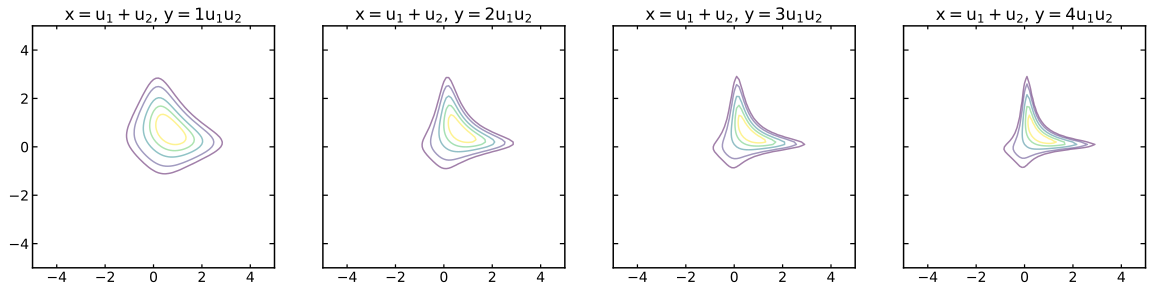

In [60]:
u1u2_factors = np.arange(1, 5)

fig, ax = plt.subplots(1, 4, figsize=(20, 80), sharey=True)

for i in range(len(u1u2_factors)):
    P, B, L = generate_non_gaussian_surface_from_function(mu, cov, d, 
                                            n_row, n_col, 1, 1, u1u2_factors[i]) 
                                            #u1_params, u2_params) # B and P are meshgrid variables
    Levels = get_levels(L, Percentages)
    p = P[0]
    b = B.T[0]
    ax[i].contour(p, b, L, levels=Levels, alpha=0.5, extend='both')
    ax[i].set_aspect('equal')
    ax[i].set_title(r'$x=u_1+u_2$, $y={}u_1u_2$'.format(u1u2_factors[i]))

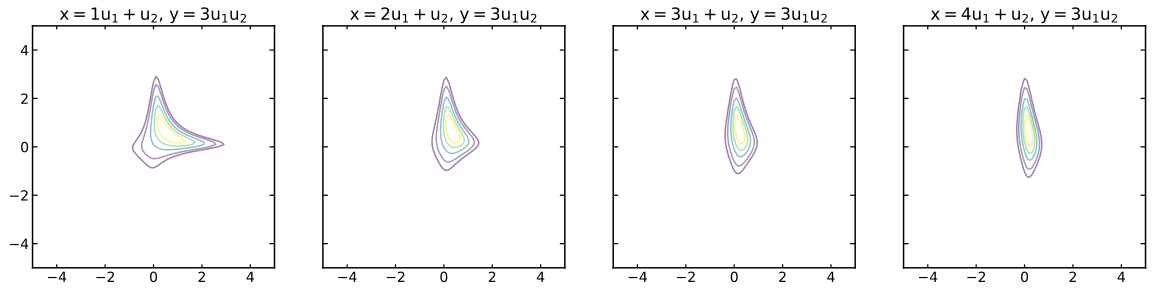

In [63]:
u1_factors = np.arange(1, 5)

fig, ax = plt.subplots(1, 4, figsize=(20, 80), sharey=True)

for i in range(len(u1u2_factors)):
    P, B, L = generate_non_gaussian_surface_from_function(mu, cov, d, 
                                            n_row, n_col, u1_factors[i], 1, 3) 
                                            #u1_params, u2_params) # B and P are meshgrid variables
    Levels = get_levels(L, Percentages)
    p = P[0]
    b = B.T[0]
    ax[i].contour(p, b, L, levels=Levels, alpha=0.5, extend='both')
    ax[i].set_aspect('equal')
    ax[i].set_title(r'$x={}u_1+u_2$, $y=3u_1u_2$'.format(u1_factors[i]))

In [64]:
def generate_non_gaussian_surface_from_function(mean, covariance, d, n_u1, n_u2, a, b, c):
    """Helper function to generate density surface."""
    # Generate random variables u1 & u2
    u1s = np.linspace(-5, 5, num=n_u1)
    u2s = np.linspace(-5, 5, num=n_u2)
    u1, u2 = np.meshgrid(u1s, u2s) # Generate grid
    pdf = np.zeros((n_u1, n_u2))
    # Fill the cost matrix for each combination of weights
    for i in range(n_u1):
        for j in range(n_u2):
            pdf[i,j] = multivariate_normal(
                np.matrix([[u1[i,j]], [u2[i,j]]]), 
                d, mean, covariance)
    
    # Generate x, y which are functions of u1 and/or u2
    x = u1+u2

    y = a*u1**2 + b*u1*u2 + c*u2**2
    ############ NOT REAL VALUES. TESTING ONLY ###############
    mu_x = 1
    sigma_x = 1
    
    mu_y = 1
    sigma_y = 1
    
    a = 0.1
    
    mu_xy = np.matrix([[mu_x], [mu_y]])
    cov_xy = np.matrix([[(sigma_x**2), a], 
                        [a, (sigma_y**2)]])
    ########### ^NOT REAL VALUES. TESTING ONLY^ ##############
    
    pdf_xy = np.zeros((n_u1, n_u2))
    # Fill the cost matrix for each combination of weights
    for i in range(n_u1):
        for j in range(n_u2):
            pdf_xy[i,j] = multivariate_normal(
                np.matrix([[x[i,j]], [y[i,j]]]), 
                d, mu_xy, cov_xy)
    return u1, u2, pdf_xy  # x1, x2, pdf(x1,x2)

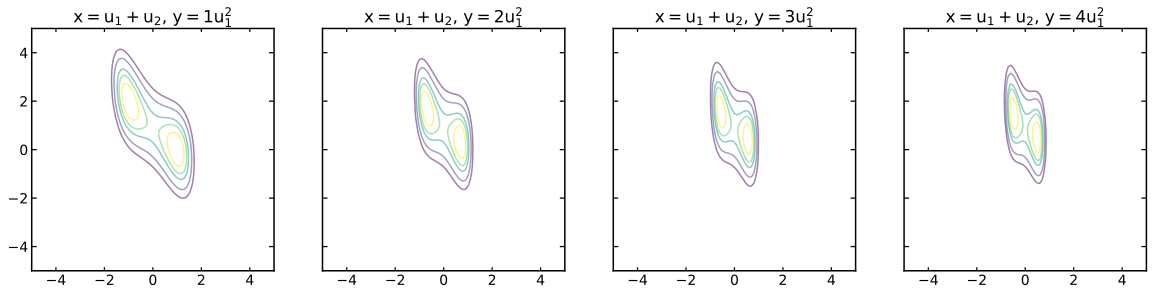

In [70]:
factors = np.arange(1, 5)

fig, ax = plt.subplots(1, 4, figsize=(20, 80), sharey=True)

for i in range(len(factors)):
    P, B, L = generate_non_gaussian_surface_from_function(mu, cov, d, 
                                            n_row, n_col, factors[i], 0, 0) 
                                            #u1_params, u2_params) # B and P are meshgrid variables
    Levels = get_levels(L, Percentages)
    p = P[0]
    b = B.T[0]
    ax[i].contour(p, b, L, levels=Levels, alpha=0.5, extend='both')
    ax[i].set_aspect('equal')
    ax[i].set_title(r'$x=u_1+u_2$, $y={}u_1^2$'.format(factors[i]))

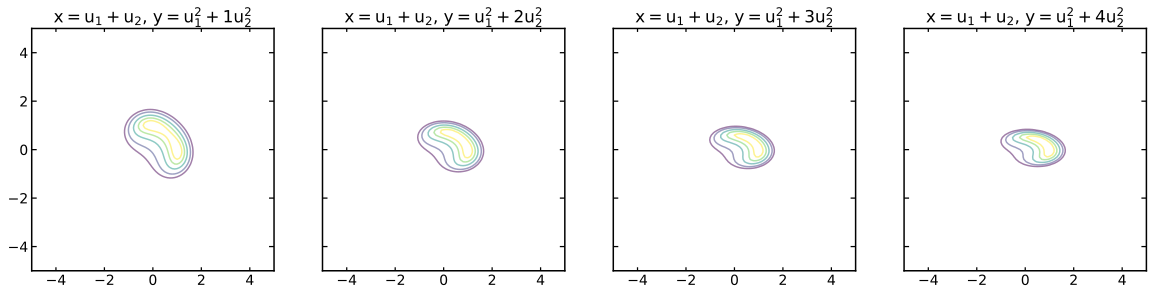

In [71]:
factors = np.arange(1, 5)

fig, ax = plt.subplots(1, 4, figsize=(20, 80), sharey=True)

for i in range(len(factors)):
    P, B, L = generate_non_gaussian_surface_from_function(mu, cov, d, 
                                            n_row, n_col, 1, 0, factors[i]) 
                                            #u1_params, u2_params) # B and P are meshgrid variables
    Levels = get_levels(L, Percentages)
    p = P[0]
    b = B.T[0]
    ax[i].contour(p, b, L, levels=Levels, alpha=0.5, extend='both')
    ax[i].set_aspect('equal')
    ax[i].set_title(r'$x=u_1+u_2$, $y=u_1^2+{}u_2^2$'.format(factors[i]))

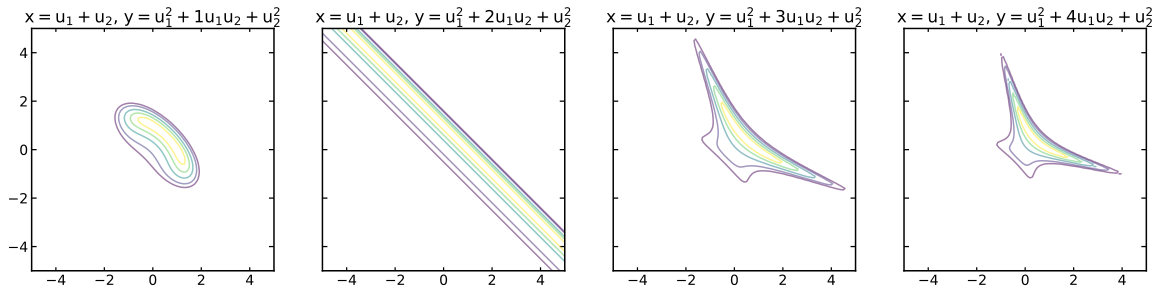

In [72]:
factors = np.arange(1, 5)

fig, ax = plt.subplots(1, 4, figsize=(20, 80), sharey=True)

for i in range(len(factors)):
    P, B, L = generate_non_gaussian_surface_from_function(mu, cov, d, 
                                            n_row, n_col, 1, factors[i], 1) 
                                            #u1_params, u2_params) # B and P are meshgrid variables
    Levels = get_levels(L, Percentages)
    p = P[0]
    b = B.T[0]
    ax[i].contour(p, b, L, levels=Levels, alpha=0.5, extend='both')
    ax[i].set_aspect('equal')
    ax[i].set_title(r'$x=u_1+u_2$, $y=u_1^2+{}u_1u_2 + u_2^2$'.format(factors[i]))

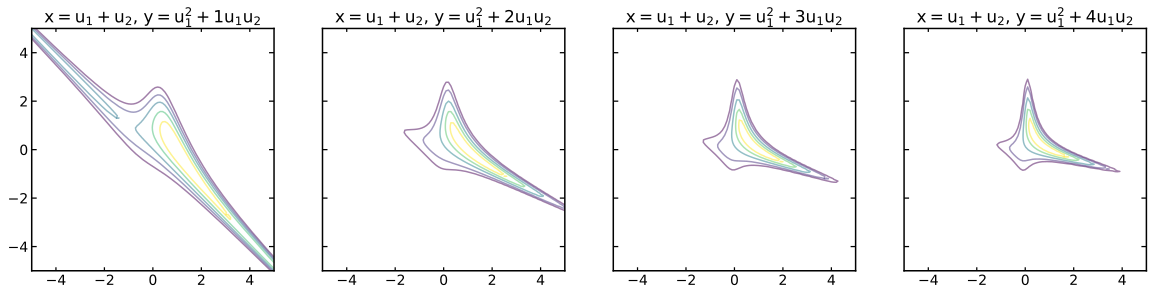

In [73]:
factors = np.arange(1, 5)

fig, ax = plt.subplots(1, 4, figsize=(20, 80), sharey=True)

for i in range(len(factors)):
    P, B, L = generate_non_gaussian_surface_from_function(mu, cov, d, 
                                            n_row, n_col, 1, factors[i], 0) 
                                            #u1_params, u2_params) # B and P are meshgrid variables
    Levels = get_levels(L, Percentages)
    p = P[0]
    b = B.T[0]
    ax[i].contour(p, b, L, levels=Levels, alpha=0.5, extend='both')
    ax[i].set_aspect('equal')
    ax[i].set_title(r'$x=u_1+u_2$, $y=u_1^2+{}u_1u_2$'.format(factors[i]))

In [21]:
class LinearParam:
    def __init__(self, u, m, c):
        self.u = u
        self.m = m
        self.c = c
    
    def func(self):
        return self.m*self.u+self.c

class QuadraticParam:
    def __init__(self, u, a, b, c):
        self.u = u
        self.a = a
        self.b = b
        self.c = c
        
    def func(self):
        return self.a*(self.u**2)+self.b*self.u+self.c

In [24]:
u = np.linspace(-1, 1, 101)
X = LinearParam(u, 2, 3)
X.func()

array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
       1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
       1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28,
       2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72,
       2.76, 2.8 , 2.84, 2.88, 2.92, 2.96, 3.  , 3.04, 3.08, 3.12, 3.16,
       3.2 , 3.24, 3.28, 3.32, 3.36, 3.4 , 3.44, 3.48, 3.52, 3.56, 3.6 ,
       3.64, 3.68, 3.72, 3.76, 3.8 , 3.84, 3.88, 3.92, 3.96, 4.  , 4.04,
       4.08, 4.12, 4.16, 4.2 , 4.24, 4.28, 4.32, 4.36, 4.4 , 4.44, 4.48,
       4.52, 4.56, 4.6 , 4.64, 4.68, 4.72, 4.76, 4.8 , 4.84, 4.88, 4.92,
       4.96, 5.  ])

In [ ]:
def linear_u1(u1_param, u2_param):
    return u1_param.m*u1_param.u+u1_param.c

def linear_u2(u1, u2):
    return u2

def linear_coupled(u1, u2):
    return u1+u2

def 

In [14]:
mu_u1, mu_u2 = 0, 0
sigma_u1, sigma_u2 = 1, 1
alpha = 0
n_row, n_col = 101, 101
# u1_params = Param(0.1, 0.2, 0.3)
# u2_params = Param(0.1, 0.2, 0.3)

mu = np.matrix([[mu_u1], [mu_u2]])  # Mean
cov = np.matrix([[(sigma_u1**2), alpha], 
                 [alpha, (sigma_u2**2)]])  # Covariance

P, B, L = generate_non_gaussian_surface(mu, cov, d, 
                                        n_row, n_col) 
                                        #u1_params, u2_params) # B and P are meshgrid variables
p = P[0]
b = B.T[0]

In [15]:
Levels = get_levels(L, Percentages)

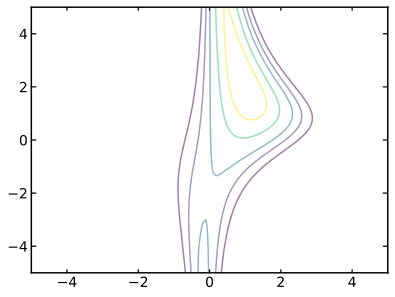

In [16]:
fig, ax = plt.subplots(1, 1)
ax.contour(p, b, L,
           levels=Levels, 
           alpha=0.5,
           extend='both')

(<Figure size 640x480 with 5 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>], dtype=object))

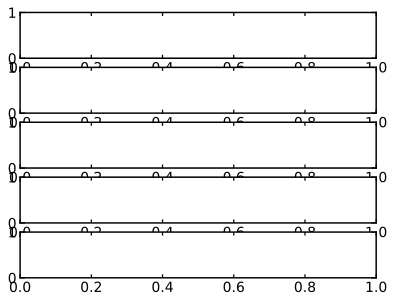

In [26]:
plt.subplots(5, 1)